### Demo: Communicating Results 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
hr = pd.read_csv("data/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.shape

(14999, 10)

#### Boxplots

Boxplots are useful to compare the distribution of a continuous variable against different categories.
http://seaborn.pydata.org/generated/seaborn.boxplot.html

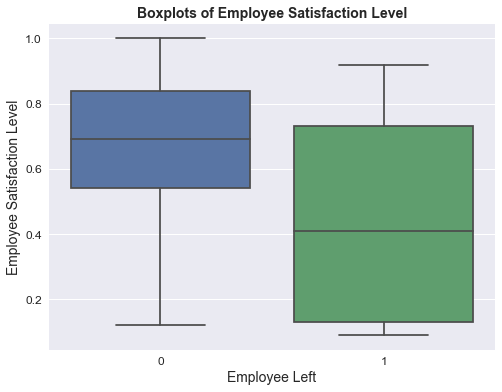

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot("left", "satisfaction_level", data=hr)
plt.xlabel("Employee Left", fontsize=14)
plt.ylabel("Employee Satisfaction Level", fontsize=14)
plt.title("Boxplots of Employee Satisfaction Level", fontsize=14, weight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Save the figure to an external image file
plt.savefig('boxplot.png', dpi=200)
plt.show()

#### Violin Plots

Violin plots are an extension of box plots and provide additional information about the density of the distribution http://seaborn.pydata.org/generated/seaborn.violinplot.html

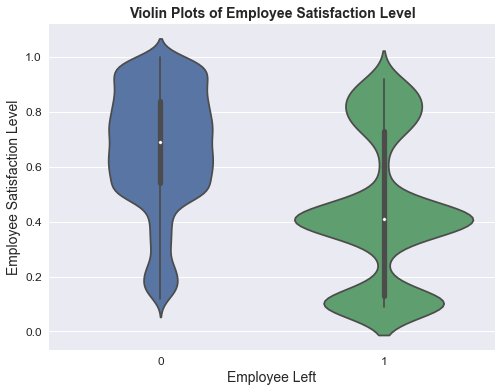

In [5]:
plt.figure(figsize=(8,6))
sns.violinplot("left", "satisfaction_level", split=True, data=hr)
plt.xlabel("Employee Left", fontsize=14)
plt.ylabel("Employee Satisfaction Level", fontsize=14)
plt.title("Violin Plots of Employee Satisfaction Level", fontsize=14, weight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Customizing Default Parameters

We can specify and update the default parameters so that we don't need to keep changing them each time we create a plot.

https://matplotlib.org/users/customizing.html

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = "bold"
plt.rcParams['axes.labelsize'] = 14

Violin Plots can be split by an additional binary category as well

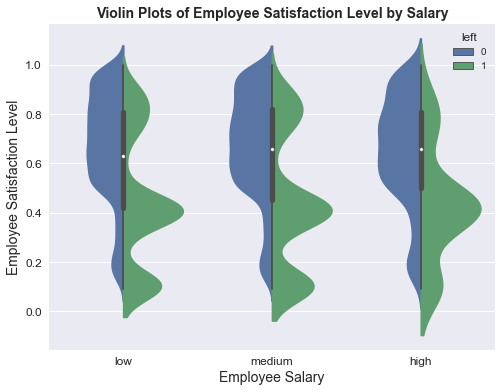

In [7]:
sns.violinplot(y="satisfaction_level", x="salary", hue="left", split=True, data=hr)
plt.xlabel("Employee Salary")
plt.ylabel("Employee Satisfaction Level")
plt.title("Violin Plots of Employee Satisfaction Level by Salary")
plt.show()

#### Scatter / Pair Plots

http://seaborn.pydata.org/generated/seaborn.pairplot.html

Scatter plots are useful to visualize patterns and trends across two continuous variable dimensions

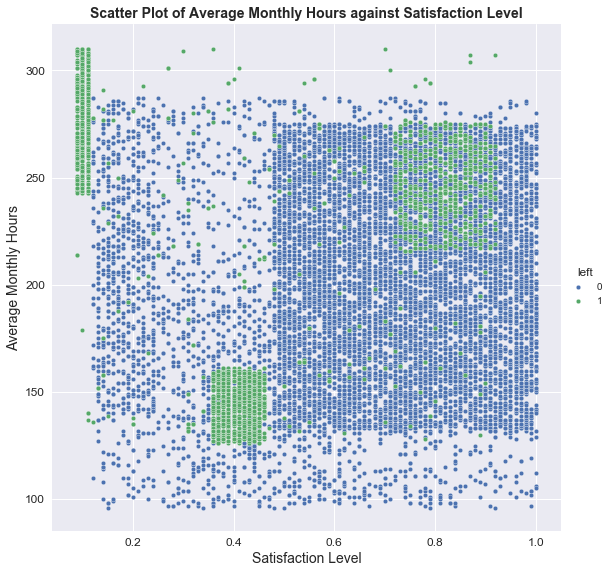

In [8]:
sns.pairplot(x_vars="satisfaction_level", y_vars="average_monthly_hours", hue="left", data=hr, size=8, plot_kws={"s": 20})
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.title("Scatter Plot of Average Monthly Hours against Satisfaction Level")
plt.show()

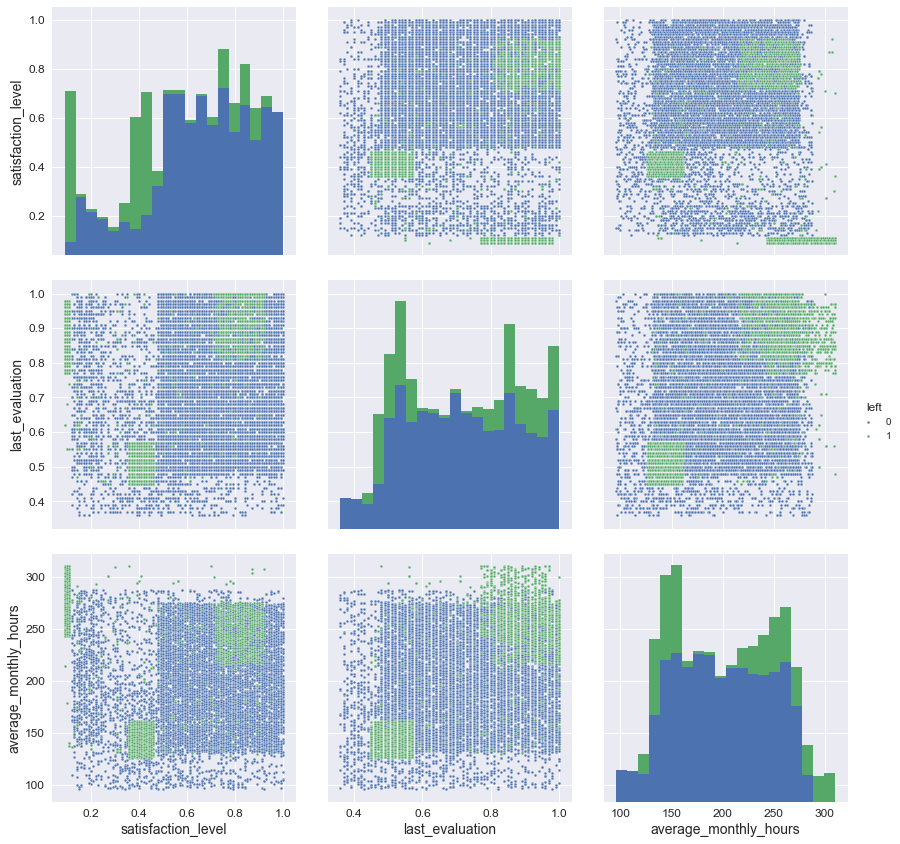

In [9]:
sns.pairplot(hr, vars=["satisfaction_level", "last_evaluation", "average_monthly_hours"], hue="left", size=4,
             plot_kws={"s": 8}, diag_kws={"bins":20})
plt.show()

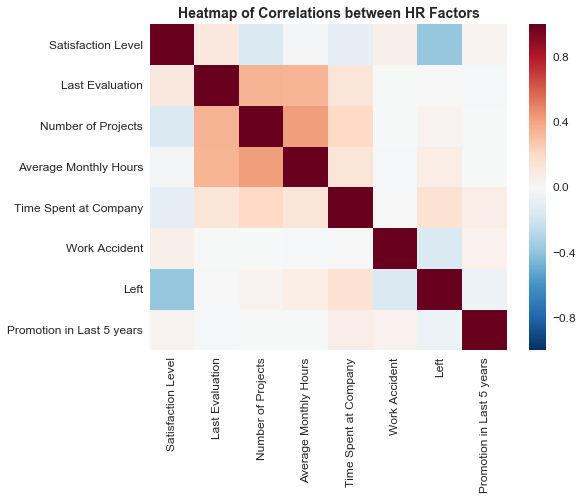

In [10]:
plt.figure()
labels = ["Satisfaction Level", "Last Evaluation", "Number of Projects", "Average Monthly Hours", "Time Spent at Company", "Work Accident", "Left", "Promotion in Last 5 years"]
sns.heatmap(hr.corr(), xticklabels=labels, yticklabels=labels)
plt.title("Heatmap of Correlations between HR Factors")
plt.show()

#### Logistic Regression Model

In [11]:
factors = ["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "time_spent_company", "work_accident", "promotion_last_5years"]
X = StandardScaler().fit_transform(hr[factors])
#X = hr[factors]
y = hr["left"]

In [12]:
lm = LogisticRegression()
lm.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
lm.score(X, y)

0.76551770118007867

In [14]:
lm.coef_

array([[-1.02405682,  0.13022008, -0.3794244 ,  0.21627677,  0.33078347,
        -0.52489585, -0.25826845]])

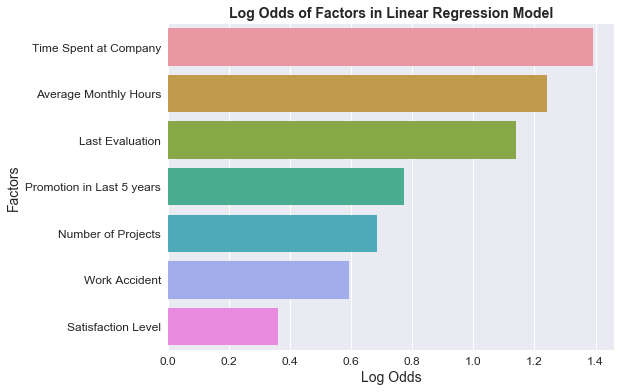

In [15]:
labels = ["Satisfaction Level", "Last Evaluation", "Number of Projects", "Average Monthly Hours", "Time Spent at Company", "Work Accident", "Promotion in Last 5 years"]
coef_df = pd.DataFrame({"labels": labels, "log_odds": np.exp(lm.coef_[0])})
plt.figure()
ax = sns.barplot("log_odds", "labels", data=coef_df.sort_values(by="log_odds", ascending=False))
ax.set(xlabel="Log Odds", ylabel="Factors", title="Log Odds of Factors in Linear Regression Model")
plt.show()

#### ROC Plots

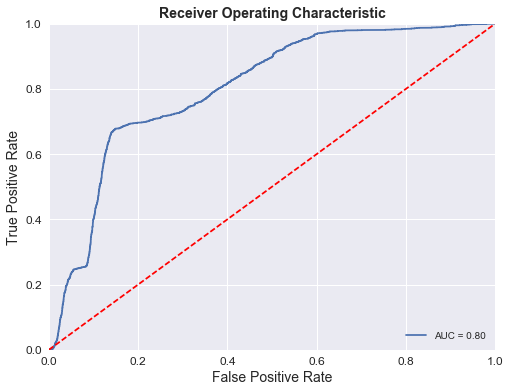

In [16]:
probs = lm.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)

roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
lm2 = LogisticRegression()
lm2.fit(X[:,3:], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

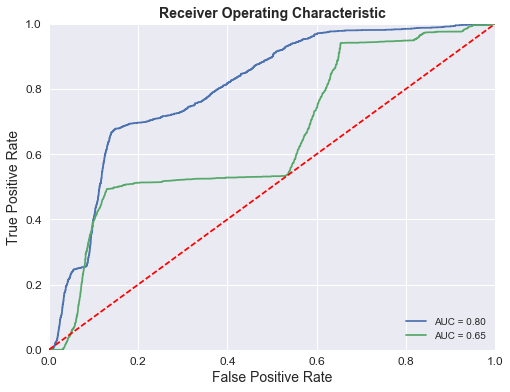

In [18]:
probs = lm.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

probs2 = lm2.predict_proba(X[:,3:])
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, label = 'AUC = %0.2f' % roc_auc2)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
dc = DummyClassifier()
dc.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

#### Precision Recall Plots 

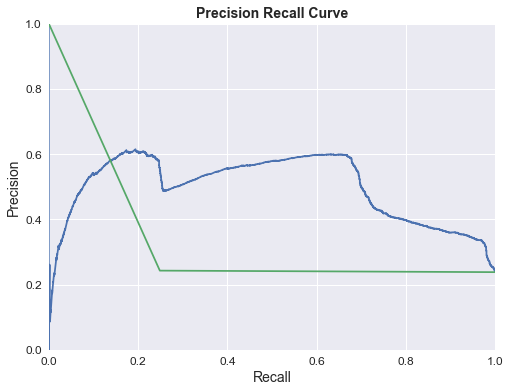

In [20]:
plt.figure()
precision, recall, thresholds = metrics.precision_recall_curve(hr["left"], lm.predict_proba(X)[:,1])
plt.plot(recall, precision)
precision, recall, thresholds = metrics.precision_recall_curve(hr["left"], dc.predict_proba(X)[:,1])
plt.plot(recall, precision)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Precision Recall Curve')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

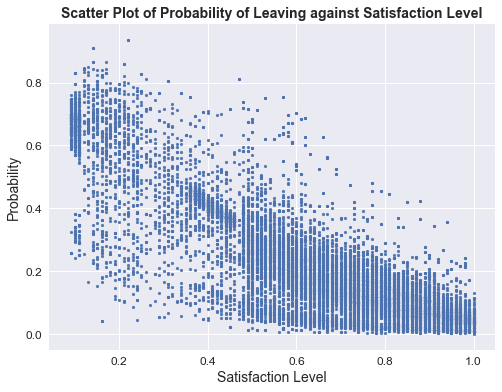

In [21]:
plt.figure()
plt.scatter(hr["satisfaction_level"], lm.predict_proba(X)[:,1], s=8)
plt.title("Scatter Plot of Probability of Leaving against Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Probability")
plt.show()

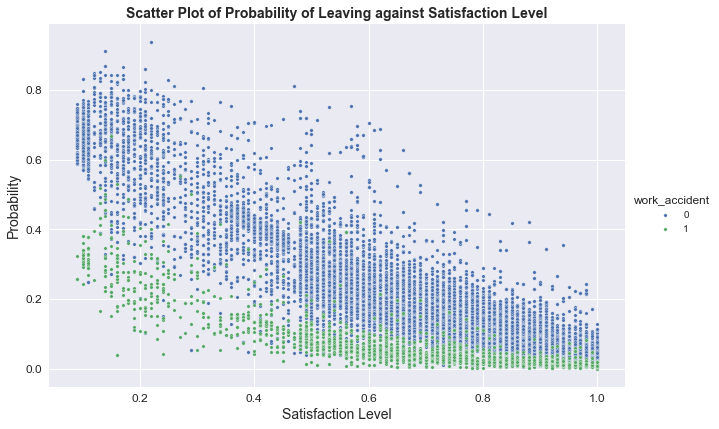

In [22]:
hr["probability_left"] = lm.predict_proba(X)[:,1]
sns.pairplot(x_vars="satisfaction_level", y_vars="probability_left", hue="work_accident", data=hr, size=6, aspect=1.5, plot_kws={"s": 12})
plt.title("Scatter Plot of Probability of Leaving against Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Probability")
plt.show()

#### Useful Tutorials
- https://elitedatascience.com/python-seaborn-tutorial
- https://www.labri.fr/perso/nrougier/teaching/matplotlib/
- https://matplotlib.org/users/pyplot_tutorial.html